<a href="https://colab.research.google.com/github/eshetuD/Data_Analysis/blob/main/Mexicohouse_price.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.utils.validation import check_is_fitted

In [14]:
#create a function

def wrangle(filepath):
  #read file
  df = pd.read_csv(filepath)
  #mask Capital Federal
  mask_ba = df["place_with_parent_names"].str.contains("Capital Federal")
  #mask Apartment only
  mask_apt = df["property_type"] == "apartment"
  #mask apartment only with less than 400000 usd
  mask_price = df["price_aprox_usd"] < 400000

  df = df[mask_ba & mask_apt & mask_price]

  #remove outliers
  low,high = df["surface_covered_in_m2"].quantile([0.1,0.9])
  mask_out = df["surface_covered_in_m2"].between(low,high)

  df = df[mask_out]

  return df

In [15]:
df = wrangle("Book1.csv")
df.head()

,operation,property_type,place_with_parent_names,lat-lon,price,currency,price_aprox_local_currency,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses
4,sell,apartment,|Argentina|Capital Federal|Chacarita|,"-34.5846508988,-58.4546932614",129000.0,USD,1955949.6,129000.0,76.0,70.0,1697.368421,1842.857143,NaN,NaN,NaN
9,sell,apartment,|Argentina|Capital Federal|Villa Luro|,"-34.6389789,-58.500115",87000.0,USD,1319128.8,87000.0,48.0,42.0,1812.500000,2071.428571,NaN,NaN,NaN
29,sell,apartment,|Argentina|Capital Federal|Caballito|,"-34.615847,-58.459957",118000.0,USD,1789163.2,118000.0,NaN,54.0,NaN,2185.185185,NaN,2.0,NaN
40,sell,apartment,|Argentina|Capital Federal|Constitución|,"-34.6252219,-58.3823825",57000.0,USD,864256.8,57000.0,42.0,42.0,1357.142857,1357.142857,5.0,2.0,364.0
41,sell,apartment,|Argentina|Capital Federal|Once|,"-34.6106102,-58.4125107",90000.0,USD,1364616.0,90000.0,57.0,50.0,1578.947368,1800.000000,NaN,3.0,450.0


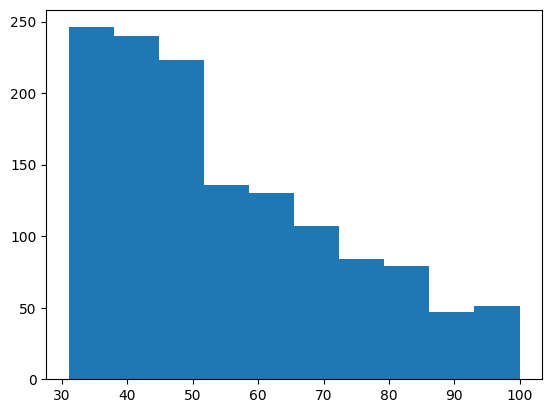

In [16]:
plt.hist(df["surface_covered_in_m2"]);

In [17]:
df["surface_covered_in_m2"].describe()


count    1343.000000
mean       55.076694
std        18.160427
min        31.000000
25%        40.000000
50%        50.000000
75%        68.500000
max       100.000000
Name: surface_covered_in_m2, dtype: float64

**Task 2.1.7:** Create a scatter plot that shows price ("price_aprox_usd") vs area ("surface_covered_in_m2") in our dataset. Make sure to label your x-axis **"Area [sq meters]"** and your y-axis **"Price [USD]**".

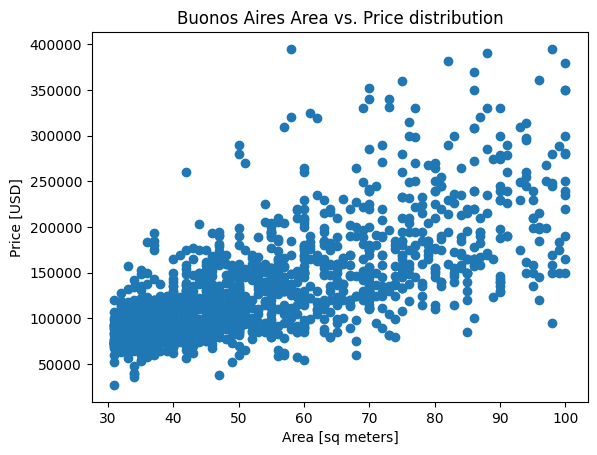

In [20]:
plt.scatter(x=df["surface_covered_in_m2"],y=df["price_aprox_usd"])
plt.xlabel("Area [sq meters]")
plt.ylabel("Price [USD]")
plt.title("Buonos Aires Area vs. Price distribution");

**Task 2.1.8:** Create the feature matrix named X_train, which you'll use to train your model. It should contain one feature only: ["surface_covered_in_m2"]. Remember that your feature matrix should always be two-dimensional.

In [24]:
features = ["surface_covered_in_m2"]
X_train = df[features]
X_train.head()

,surface_covered_in_m2
4,70.0
9,42.0
29,54.0
40,42.0
41,50.0


**Task 2.1.9:** Create the target vector named y_train, which you'll use to train your model. Your target should be "price_aprox_usd". Remember that, in most cases, your target vector should be one-dimensional.

In [25]:
target = "price_aprox_usd"
y_train = df[target]
y_train.shape

(1343,)

**Build Model**

**Baseline**

The first step in building a model is baselining. To do this, ask yourself how you will know if the model you build is performing well?" One way to think about this is to see how a "dumb" model would perform on the same data. Some people also call this a naïve or baseline model, but it's always a model makes only one prediction — in this case, it predicts the same price regardless of an apartment's size. So let's start by figuring out what our baseline model's prediction should be.

**Task 2.1.12:** Add a line to the plot below that shows the relationship between the observations X_train and our dumb model's predictions y_pred_baseline. Be sure that the line color is orange, and that it has the label "Baseline Model".

In [38]:
model = LinearRegression()

In [39]:
model.fit(X_train,y_train)

LinearRegression()

In [41]:
y_pred_train = model.predict(X_train)
y_pred_train[:5]

array([169151.87330223, 106064.44707446, 133101.91545779, 106064.44707446,
       124089.42599668])

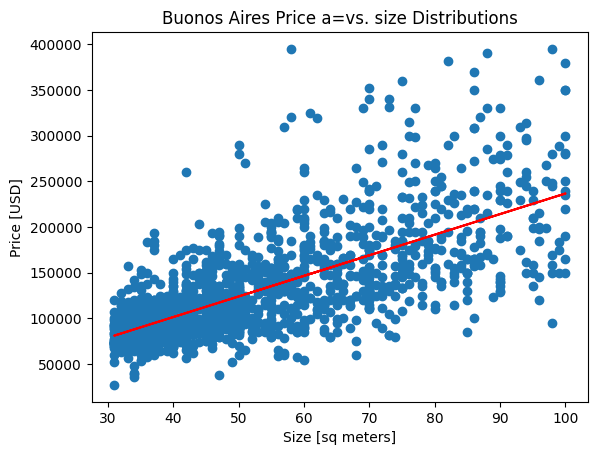

In [45]:
plt.plot(X_train,model.predict(X_train),color="red",label="Linear Model")
plt.scatter(X_train,y_train)
plt.xlabel("Size [sq meters]")
plt.ylabel("Price [USD]")
plt.title("Buonos Aires Price a=vs. size Distributions");